# 4. ZPVE Correction and Final Binding Energy Distribution

At this point we have submitted all necessary computations to construct a binding energy distribution on the 
ice-mantle model comprising five W12 cluster. So now we can proceed to put it all together and build the final binding energy distribution!  

First we need to process the Hessian matrices to calculate the ZPVE. For this purpose we will use a modified version of the Psi4 library for harmonic analysis.  Therefore to be able to use it we need to install Psi4 first on the computer where you will be running this jupyter notebook (Note that this process does not require much processing power. All the heavy lifting has already been done!). Instructions on how to install Psi4 using conda can be found on the [Psi4 webpage](https://psicode.org/installs/v15/). So first we will load Psi4 as a python module and also import the modifed vibrational analysis function from beep.

In [1]:
from beep.be_tools import zpve_correction, gauss_fitting

First we need to call the client and  the name of the `ReactionDataset` that contains the stoichiometry information and the binding energy values. Since we computed the Hessian at the HF-3C/Minix geometry we need to specify that in the name of the `ReactionDataset`

In [2]:
import qcfractal.interface as ptl
client = ptl.FractalClient(address="localhost:7777", verify=False)

molecule  = "ch3oh"
cluster = "3"
name_opt = molecule+'_W12_'+ cluster
name_be = 'be_'+name_opt+'_hf3c'

opt_method = 'hf3c_minix'
be_method = 'B3LYP-D3BJ'

Now we can retrieve the ZPVE correction using the `zpve_correction` method contained in be_tools. It returns 
a Pandas DataFrame with the non corrected, ZPVE corrected binding energies and the ZPVE correction, a list with linear fit parameters and a plot with the linear fit parameters. Note that first you need to **check that all Hessian computaions have finished**.

***
 '71.0847' '72.7707' '76.1365' '81.1445' '85.6789' '98.2442' '102.6003'
 '110.8492' '124.4148' '134.6778' '156.5218' '160.3951' '170.3494'
 '174.7688' '182.2573' '193.6702' '206.5055' '213.0835' '219.2894'
 '244.1720' '263.1794' '266.3979' '274.9937' '291.7955' '296.8576'
 '304.3612' '307.3592' '315.5907' '332.1395' '345.2647' '353.5149'
 '374.8080' '406.1262' '420.8809' '425.7766' '486.3282' '503.5932'
 '513.4486' '532.5160' '542.2398' '548.2380' '578.5389' '587.6205'
 '598.3906' '621.7463']
***
 '84.6629' '86.4380' '103.7179' '118.0522' '127.8023' '155.4648'
 '156.1533' '167.6034' '172.4977' '187.0890' '192.3980' '198.4043'
 '205.9175' '236.6367' '257.9535' '261.1205' '271.1369' '276.5190'
 '294.5148' '295.3153' '305.4383' '308.5439' '322.4751' '334.3172'
 '350.7069' '369.7024' '401.9366' '416.6998' '436.7409' '477.9009'
 '505.7720' '508.0232' '510.9780' '521.9797' '543.3368' '568.1526'
 '576.2564' '589.7698' '614.1779']
***
***
 '70.7387' '72.0467' '80.3144' '84.9783' '85.9046' 

***
***
 '72.3721' '74.2345' '80.4299' '85.5456' '89.7216' '104.8994' '113.4026'
 '118.2559' '134.9844' '146.0148' '153.7754' '159.2259' '167.7157'
 '172.2484' '177.3992' '189.5658' '190.4405' '199.6879' '226.7100'
 '233.0956' '259.4677' '261.2792' '274.3273' '288.3720' '299.7311'
 '309.1162' '320.4324' '325.7804' '343.3553' '359.6392' '370.0088'
 '374.1512' '423.5792' '435.7399' '438.1953' '442.0642' '494.0512'
 '508.9838' '517.4776' '531.2394' '543.6718' '565.0229' '576.9824'
 '590.2353' '608.5376']
***
 '84.6629' '86.4380' '103.7179' '118.0522' '127.8023' '155.4648'
 '156.1533' '167.6034' '172.4977' '187.0890' '192.3980' '198.4043'
 '205.9175' '236.6367' '257.9535' '261.1205' '271.1369' '276.5190'
 '294.5148' '295.3153' '305.4383' '308.5439' '322.4751' '334.3172'
 '350.7069' '369.7024' '401.9366' '416.6998' '436.7409' '477.9009'
 '505.7720' '508.0232' '510.9780' '521.9797' '543.3368' '568.1526'
 '576.2564' '589.7698' '614.1779']
***
***
 '68.0738' '70.3612' '76.3241' '80.6399' '84.7

***
***
 '70.6009' '71.6847' '77.3139' '81.0916' '87.0504' '102.4770' '113.0271'
 '118.3959' '125.6697' '135.0959' '143.5495' '151.5247' '162.2143'
 '170.0401' '178.5134' '191.0136' '203.1194' '213.2348' '242.4962'
 '250.5746' '263.2739' '269.3194' '283.4395' '286.9253' '296.9802'
 '300.7848' '305.4376' '315.2677' '331.3822' '350.7058' '368.8019'
 '383.0733' '400.7972' '427.2217' '475.8948' '500.6597' '515.3724'
 '518.4602' '530.8335' '549.2303' '556.0182' '575.5217' '580.2475'
 '594.1504' '609.2490' '622.9908']
***
 '84.6629' '86.4380' '103.7179' '118.0522' '127.8023' '155.4648'
 '156.1533' '167.6034' '172.4977' '187.0890' '192.3980' '198.4043'
 '205.9175' '236.6367' '257.9535' '261.1205' '271.1369' '276.5190'
 '294.5148' '295.3153' '305.4383' '308.5439' '322.4751' '334.3172'
 '350.7069' '369.7024' '401.9366' '416.6998' '436.7409' '477.9009'
 '505.7720' '508.0232' '510.9780' '521.9797' '543.3368' '568.1526'
 '576.2564' '589.7698' '614.1779']
***
***
 '71.4364' '72.6489' '80.7354' '82.

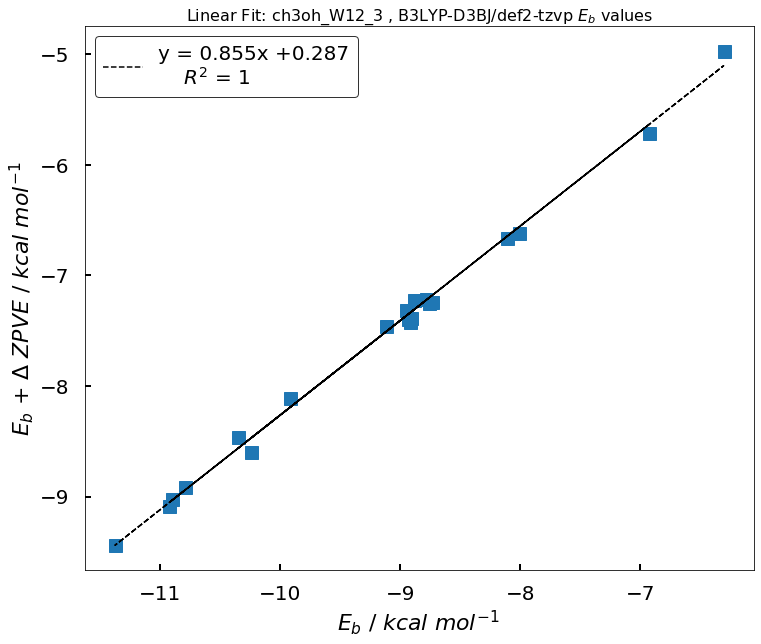

In [10]:
df_zpve_corr, fit_data, fig =  zpve_correction(name_be, be_method, opt_method, client=client)

We can see the ZPVE corrected and the original values of this sampled water cluster in the resulting dataframe `df_zpve_corr'

In [4]:
df_zpve_corr

,B3LYP/def2-tzvp,B3LYP/def2-svp,B3LYP-D3BJ/def2-tzvp,B3LYP-D3BJ/def2-svp,Delta_ZPVE,Eb_ZPVE
ch3oh_w12_3_0001,-6.766671,-7.480718,-8.907313,-9.62136,1.522585,-7.384728
ch3oh_w12_3_0002,-8.110982,-9.168301,-10.245449,-11.302769,1.649834,-8.595615
ch3oh_w12_3_0003,-8.209051,-5.706005,-9.917144,-7.414099,1.806372,-8.110771
ch3oh_w12_3_0006,-6.466742,-7.078604,-8.737617,-9.349479,1.497892,-7.239724
ch3oh_w12_3_0008,-8.252462,-9.580158,-10.927993,-12.255689,1.845272,-9.082720
ch3oh_w12_3_0012,-8.407111,-9.157804,-10.799472,-11.550165,1.886872,-8.912601
ch3oh_w12_3_0016,-8.348709,-6.832857,-11.379328,-9.863477,1.938232,-9.441096
ch3oh_w12_3_0021,-5.951042,-6.523547,-8.00788,-8.580385,1.394122,-6.613758
ch3oh_w12_3_0023,-6.722293,-7.288665,-8.113023,-8.679396,1.455318,-6.657705
ch3oh_w12_3_0028,-4.434761,-5.47015,-6.923595,-7.958984,1.207975,-5.715621


Next we  in concatenate the DataFrames containing the binding energies bound to the 5 water clusters and correct the values with the linear model we just obtained. 

In [9]:
# Querying the database and storing binding energy results in a pandas dataframe (df_be): 


import pandas as pd

ds_be_list =[]

for i in range(1,6):
    ds_be = client.get_collection("ReactionDataset", 'be_'+ molecule +'_W12_'+str(i)+'_'+opt_method.split("_")[0])  
    val = ds_be.get_values(stoich='default', method=be_method)
    ds_be_list.append(val)
    print("Frame {}: Structures added to the E_b distribution: {} ".format(str(i), len(val)))

df_be = pd.concat(ds_be_list)
print("Total number of structures in the E_b distribution: {} ".format(len(df_be)))
df_be[be_method+'/def2-tzvp + Delta ZPVE'] = fit_data[0] * df_be[be_method+'/def2-tzvp'] +  fit_data[1]
df_be

Frame 1: Structures added to the E_b distribution: 28 
Frame 2: Structures added to the E_b distribution: 23 
Frame 3: Structures added to the E_b distribution: 20 
Frame 4: Structures added to the E_b distribution: 23 
Frame 5: Structures added to the E_b distribution: 24 
Total number of structures in the E_b distribution: 118 


,B3LYP-D3BJ/def2-tzvp,B3LYP-D3BJ/def2-svp,B3LYP-D3BJ/def2-tzvp + Delta ZPVE
ch3oh_w12_1_0019,0.043451,0.03576,0.324455
ch3oh_w12_1_0014,-9.385199,-6.85912,-7.736376
ch3oh_w12_1_0015,0.007153,0.004347,0.293422
ch3oh_w12_1_0017,-8.060355,-9.025979,-6.603727
ch3oh_w12_1_0016,0.011649,0.007175,0.297267
...,...,...,...
ch3oh_w12_5_0021,-8.866148,-9.352916,-7.292624
ch3oh_w12_5_0036,-10.015411,-9.943901,-8.275162
ch3oh_w12_5_0037,-13.60569,-9.28178,-11.344598
ch3oh_w12_5_0012,-10.122049,-10.374524,-8.36633


The  BE distribution  can now be converted to Kelvin using QCElemental conversion factors and  visualize the resulting distribution as a histogram:

Text(0, 0.5, 'frequency number')

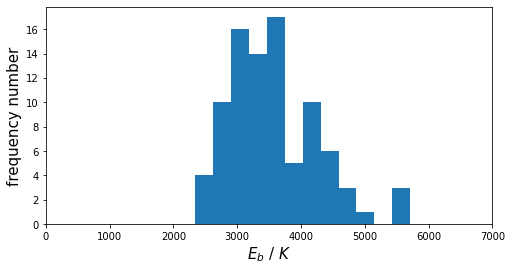

In [6]:
import qcelemental as qcel
import matplotlib.pyplot as plt

be_values = df_be['B3LYP-D3BJ/def2-tzvp + Delta ZPVE'].values

v_K = -be_values * qcel.constants.conversion_factor("kcal/mol", 'K')
v_K = v_K[v_K > 0]

nbins = 12
fig = plt.figure(figsize=(8,4))
plt.hist(v_K, bins=nbins)
plt.xlim([0, 7000])
plt.xlabel('$E_b$ / $K$ ', size = 15)
plt.ylabel('frequency number',size = 15)

Finally we apply a boostrap fit to obtain the mean and standard deviation of the resulting BE distribiuiton. For this we use the method `gauss_fitting` from be_tools. It requieres an initial guess and using that guess it generatas a user defined number of distribuitons within the Poisson error of each bin.

Startig the curve fit within the Poisson error
Fitting the Gaussian parameters A, mu and sigma
The best fit is: A: 15.33005106695094 mu: 3365.800393158717 sigma: 667.6826069697223


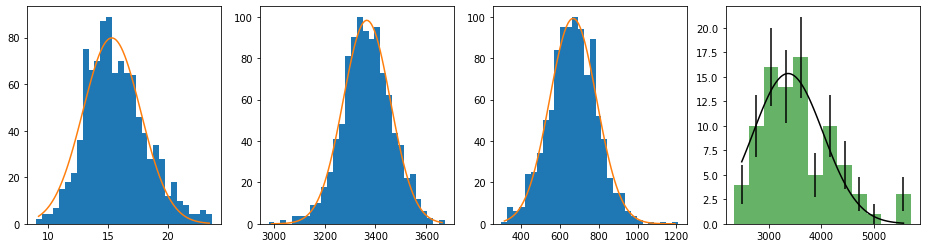

In [7]:
vbest = gauss_fitting(12, v_K, [15,3200,500], nboot=1000)

That's all! even a 12 water molecule set of 5 clusters was able to get to within 150K from the published value on the 22 water molcules! Have fun BEEPing! 